In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.layers import Conv2D, Flatten,Dense, MaxPooling2D, Dropout
from keras.models import Sequential
import io

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving datasets.py to datasets (1).py


In [ ]:
from datasets import load_hoda

In [ ]:
x_train, y_train, x_test,y_test= load_hoda(training_sample_size=3500, test_sample_size=500, size=28)

In [ ]:
x_train.shape

(3500, 784)

In [ ]:
y_train.shape

(3500,)

In [ ]:
x_test.shape

(500, 784)

In [ ]:
y_test.shape

(500,)

In [ ]:
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

In [ ]:
x_train, x_test= x_train/255, x_test/255

In [ ]:
x_train= x_train.reshape(-1,28,28,1)
x_test= x_test.reshape(-1,28,28,1)

In [ ]:
def create_model():
   model= Sequential()
   model.add(keras.Input(shape=(28,28,1)))
   model.add(Conv2D(32,(3,3),activation='relu'))
   model.add(MaxPooling2D(2,2))
   model.add(Conv2D(64,(3,3), activation='relu'))
   model.add(MaxPooling2D(2,2))
   model.add(Flatten())
   model.add(Dense(64, activation='relu'))
   model.add(Dropout(0.5))
   model.add(Dense(10, activation='softmax'))
   return model


In [ ]:
model= create_model()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=256)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.0983 - loss: 2.3024 - val_accuracy: 0.0943 - val_loss: 2.3019
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1271 - loss: 2.3005 - val_accuracy: 0.1014 - val_loss: 2.2983
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1546 - loss: 2.2946 - val_accuracy: 0.3814 - val_loss: 2.2854
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2440 - loss: 2.2764 - val_accuracy: 0.5014 - val_loss: 2.2466
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3136 - loss: 2.2272 - val_accuracy: 0.3871 - val_loss: 2.1591
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3691 - loss: 2.1274 - val_accuracy: 0.5171 - val_loss: 1.9847
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4515 - loss: 1.9372 - val_accuracy: 0.5800 - val_loss: 1.7124
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4603 - loss: 1.7104 - val_accuracy: 0

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<Figure size 640x480 with 0 Axes>

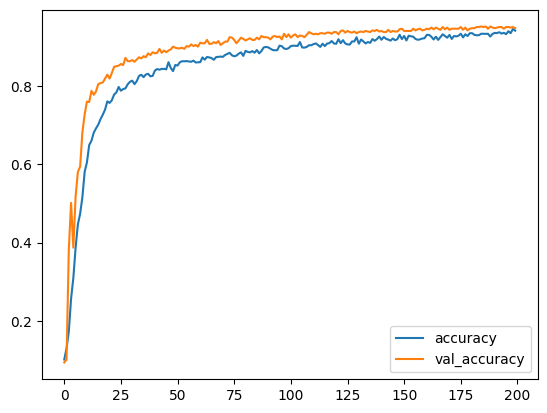

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.figure()


In [ ]:
y_pred= model.predict(x_train)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
model.evaluate(x_test,y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9715 - loss: 0.0761


[0.07154296338558197, 0.972000002861023]